In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import *
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential

In [ ]:
class Model(keras.models.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1d_1 = keras.layers.Conv1D(256, 3, strides=1, padding="same")
        self.conv1d_2 = keras.layers.Conv1D(128, 3, strides=1, padding="same")

        self.multihead_attention_1 = layers.MultiHeadAttention(4, 64, 64)
        self.multihead_attention_2 = layers.MultiHeadAttention(1, 64, 64)

        self.conv1d_3 = keras.layers.Conv1D(128, 1, activation="relu")

        self.gap = keras.layers.GlobalAveragePooling1D()
        self.fc = keras.layers.Dense(128, activation="relu")
        self.softmax = keras.layers.Softmax(axis=-1)

    def call(self, inputs):
        crm1, crm2 = inputs

        # Convolutional layers1
        x1 = self.conv1d_1(crm1)
        x1 = self.conv1d_2(x1)
        x2 = self.conv1d_1(crm2)
        x2 = self.conv1d_2(x2)

        # Multi-head attention1
        x3 = self.multihead_attention_1(x1, x2)
        x4 = self.multihead_attention_1(x2, x1)
        x1 = keras.layers.add([x1, x3])
        x2 = keras.layers.add([x2, x4])

        # Convolutional layers2
        x3 = self.conv1d_3(x1)
        x4 = self.conv1d_3(x2)
        x1 = keras.layers.add([x1, x3])
        x2 = keras.layers.add([x2, x4])

        # Multi-head attention2
        x3 = self.multihead_attention_2(x1, x2)
        x4 = self.multihead_attention_2(x2, x1)
        x1 = keras.layers.add([x1, x3])
        x2 = keras.layers.add([x2, x4])

        # Convolutional layers3
        x3 = self.conv1d_3(x1)
        x4 = self.conv1d_3(x2)
        x1 = keras.layers.add([x1, x3])
        x2 = keras.layers.add([x2, x4])

        # Concatenate the two sequences
        x = keras.layers.add([x1, x2])
        # Global average pooling
        x = keras.layers.Reshape((-1, 128))(x)
        x = self.gap(x)

        # Dense layer
        x = self.fc(x)
        x = self.fc(x)
        x = self.fc(x)
        x = self.fc(x)

        # Softmax layer
        x = self.softmax(x)

        return x

crm1 = Input(shape=(28,28,3))
crm2 = Input(shape=(28,28,3))
model = Model()

dot_img_file = 'Model.png'
_ = model([crm1, crm2])
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_47 (Conv1D)          multiple                  2560      
                                                                 
 conv1d_48 (Conv1D)          multiple                  98432     
                                                                 
 multi_head_attention_28 (M  multiple                  131968    
 ultiHeadAttention)                                              
                                                                 
 multi_head_attention_29 (M  multiple                  33088     
 ultiHeadAttention)                                              
                                                                 
 conv1d_49 (Conv1D)          multiple                  16512     
                                                                 
 global_average_pooling1d_1  multiple                  0  

In [ ]:
from tensorflow.keras.layers import *
import tensorflow as tf
import keras

def self_defined_model(dropout_rate):
    inputs_crm  = Input(shape=(28,28,3))
    inputs_target  = Input(shape=(28,28,3))

    x1 = tf.keras.layers.Conv1D(256, 3,padding='same',activation='relu')

    conv1_3 = tf.keras.layers.Conv1D(256, 3,padding='same',activation='relu')
    x=conv1_3(inputs_crm)
    y=conv1_3(inputs_target)
    y=tf.keras.layers.Add()([y, x])
    y = Dense(32)(y)
    y=tf.keras.layers.ReLU()(y)
    outputs = Dense(5, activation='softmax')(y)
    model_print = tf.keras.Model(inputs=[inputs_crm,inputs_target], outputs=outputs)
    dot_img_file = 'Model.png'
    keras.utils.plot_model(model_print, to_file=dot_img_file, show_shapes=True)
    model_print.summary()
self_defined_model(0.5)

ValueError: Exception encountered when calling layer "model_4" (type Model).

in user code:

    File "<ipython-input-18-821b585b8e10>", line 54, in call  *
        x = self.gap(x)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "global_average_pooling1d_4" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 28, 28, 128)


Call arguments received by layer "model_4" (type Model):
  • inputs=['tf.Tensor(shape=(None, 28, 28, 3), dtype=float32)', 'tf.Tensor(shape=(None, 28, 28, 3), dtype=float32)']

In [ ]:
from tensorflow.keras.layers import *
import tensorflow as tf
import keras
# --------------------------------------------------

def self_defined_model(dropout_rate):
    inputs_crm  = Input(shape=(28,28,3))
    inputs_target  = Input(shape=(28,28,3))
    conv1_3 = tf.keras.layers.Conv1D(256, 3,padding='same',activation='relu')
    x=conv1_3(inputs_crm)
    y=conv1_3(inputs_target)
    y=tf.keras.layers.Add()([y, x])
    y = Dense(32)(y)
    y=tf.keras.layers.ReLU()(y)
    outputs = Dense(5, activation='softmax')(y)
    model_print = tf.keras.Model(inputs=[inputs_crm,inputs_target], outputs=outputs)
    dot_img_file = 'Model.png'
    keras.utils.plot_model(model_print, to_file=dot_img_file, show_shapes=True)
    model_print.summary()
self_defined_model(0.5)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1d_22 (Conv1D)          (None, 28, 28, 256)          2560      ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 add_9 (Add)                 (None, 28, 28, 256)          0         ['conv1d_22[1][0]',     

Model: "self_defined_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 213)]           0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 512, 213)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 512, 256)             163840    ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 512, 128)             98432     ['conv1d[0][0

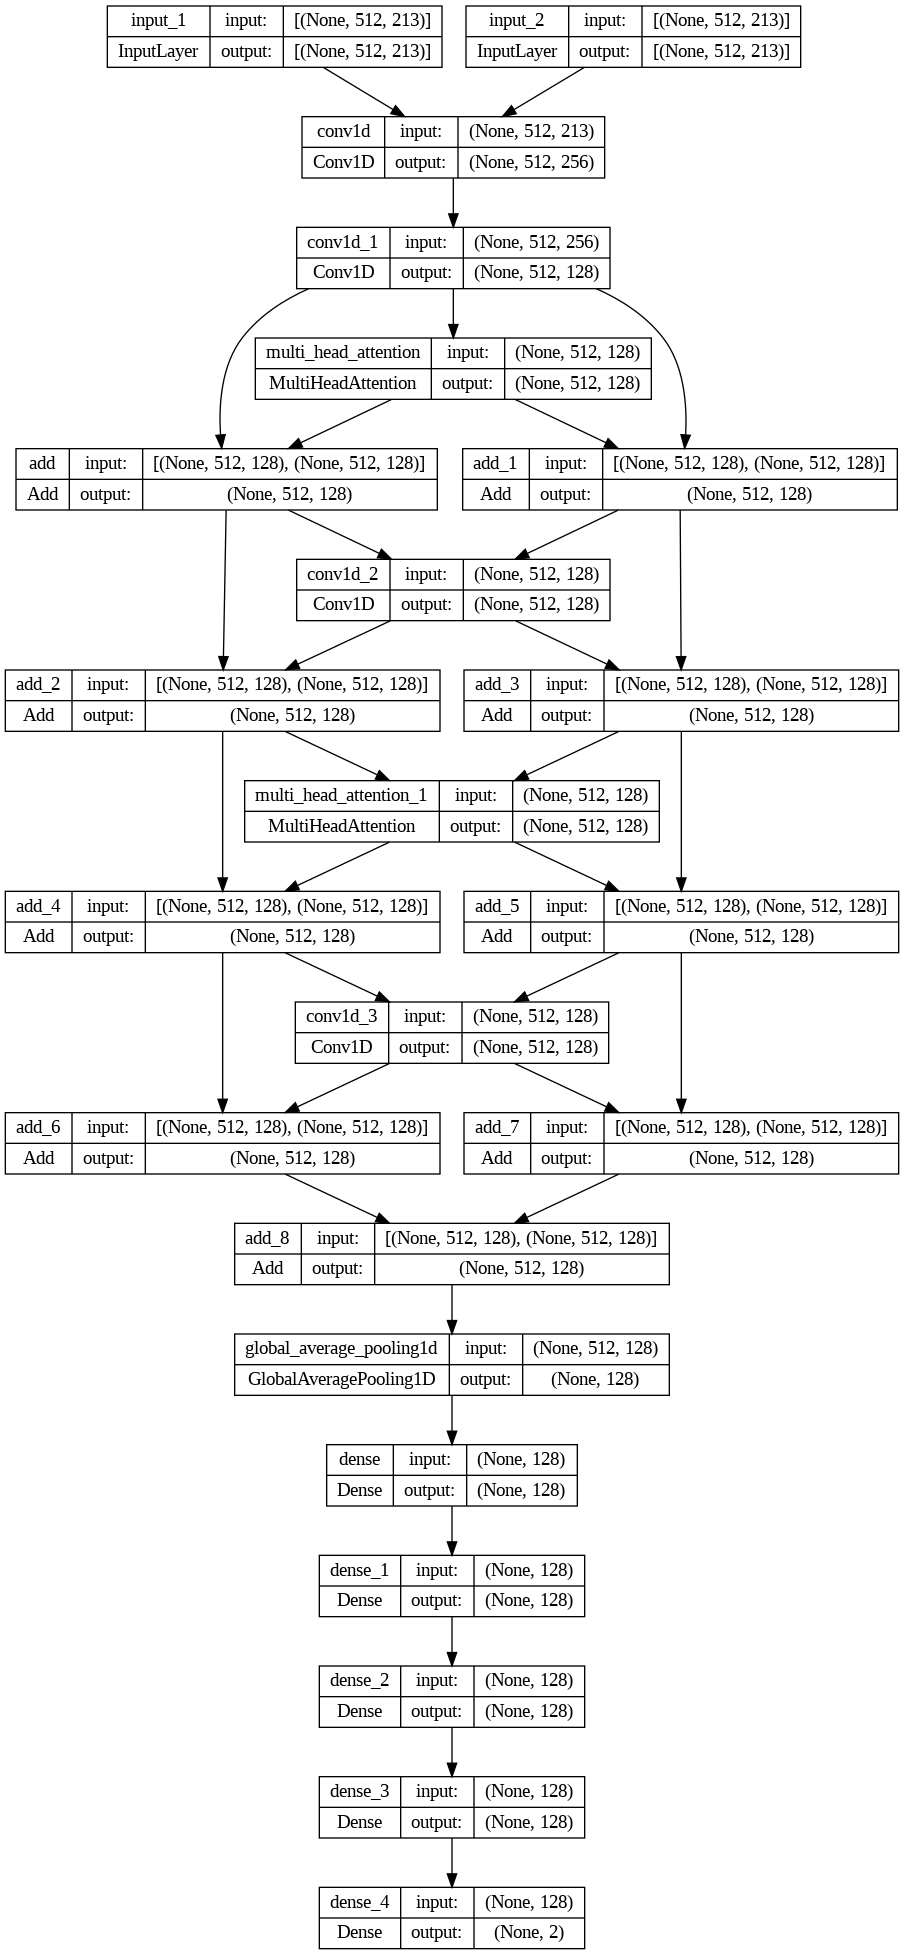

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import *
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential

def self_defined_model():
    inputs1 = Input(shape=(512, 213))
    inputs2 = Input(shape=(512, 213))

    # Convolutional layers1

    conv1d = keras.layers.Conv1D(256, 3, strides=1, padding='same')
    x1 = conv1d(inputs1)
    x2 = conv1d(inputs2)

    conv1d_1 = keras.layers.Conv1D(128, 3, strides=1, padding='same')
    x1 = conv1d_1(x1)
    x2 = conv1d_1(x2)

    # Multi-head attention1
    mh1 = layers.MultiHeadAttention(num_heads=4, key_dim=64, value_dim=64)
    x3 = mh1(x1, x2)
    x4 = mh1(x2, x1)
    x1 = layers.Add()([x1, x3])
    x2 = layers.Add()([x2, x4])

    # Convolutional layers2
    xx1=x1
    xx2=x2
    conv1d_2 = keras.layers.Conv1D(128, 1, strides=1, padding='same')
    x1 = conv1d_2(x1)
    x2 = conv1d_2(x2)
    x1 = layers.Add()([xx1, x1])
    x2 = layers.Add()([xx2, x2])

    # Multi-head attention2
    mh2 = layers.MultiHeadAttention(num_heads=4, key_dim=64, value_dim=64)
    x3 = mh2(x1, x2)
    x4 = mh2(x2, x1)
    x1 = layers.Add()([x1, x3])
    x2 = layers.Add()([x2, x4])

    # Convolutional layers3
    conv1d_3 = keras.layers.Conv1D(128, 1, strides=1, padding='same')
    x3 = conv1d_3(x1)
    x4 = conv1d_3(x2)
    x1 = layers.Add()([x1, x3])
    x2 = layers.Add()([x2, x4])

    # Concatenate the two sequences
    x = layers.Add()([x1, x2])
    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Dense layers
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)

    # Softmax layer
    x = layers.Dense(2, activation="softmax")(x)

    model = keras.Model(inputs=[inputs1, inputs2], outputs=x, name="self_defined_model")
    return model


model = self_defined_model()
model.summary()
dot_img_file = 'Model.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
# Create an instance of the model
